## Dicease Image Classification Using Convolutional Neural Network (CNN)

#### In this notebook, we will classify small images datasets which we collect on our own. There are total 400. We will use CNN for classification.

<img src="images/small_images.jpg" style="width:850px;height:600px;">

In [92]:
import zipfile
import os
import re
import numpy as np
import tensorflow as tf
import io
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import os
import numpy as np
from PIL import Image

x = []
y = []

folder_path = "/content/drive/MyDrive/Images_NEW"  # Update with the actual path to your image folder

image_files = os.listdir(folder_path)

i = 0

for filename in image_files:

  img_path = os.path.join(folder_path, filename)


  img = Image.open(img_path)

  img = img.resize((32, 32))

  if img.mode == 'RGBA':
    img = img.convert('RGB')

        # Get numpy array
  img_array = np.array(img)  # Check if this matches the actual size of your images


  if len(img_array.shape) == 3 and img_array.shape[0] == 32 and img_array.shape[1] == 32 and img_array.shape[2] in [3, 4]:
      x.append(img_array)

  label = filename.split('_')[0]
  y.append(label)



# Convert lists into numpy arrays
x = np.array(x)

y = np.array(y)

In [95]:
print(x)

[[[[ 81  52  44]
   [ 82  54  45]
   [ 84  55  47]
   ...
   [127  67  70]
   [114  56  61]
   [ 99  44  49]]

  [[ 91  59  52]
   [ 92  61  53]
   [ 93  61  54]
   ...
   [128  65  68]
   [117  57  62]
   [105  46  53]]

  [[ 95  62  53]
   [ 98  65  57]
   [100  66  58]
   ...
   [130  66  68]
   [119  59  63]
   [109  50  56]]

  ...

  [[129  78  62]
   [132  81  63]
   [133  82  61]
   ...
   [101  65  49]
   [ 94  60  47]
   [ 89  56  44]]

  [[123  73  58]
   [129  80  64]
   [129  79  63]
   ...
   [ 96  62  48]
   [ 90  57  43]
   [ 84  51  37]]

  [[117  68  55]
   [121  72  59]
   [122  73  60]
   ...
   [ 86  52  41]
   [ 87  53  43]
   [ 82  48  38]]]


 [[[142 125  97]
   [141 124  96]
   [137 120  92]
   ...
   [142 134 130]
   [142 115 101]
   [ 79  58  51]]

  [[134 117  89]
   [131 114  86]
   [126 109  81]
   ...
   [129 109  95]
   [151 128 117]
   [ 78  54  44]]

  [[126 109  82]
   [122 105  76]
   [115  98  69]
   ...
   [146 127 113]
   [146 125 112]
   [ 64  41

In [96]:
print(y)

['cellulitis' 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis'
 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis'
 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis'
 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis'
 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis'
 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis'
 'cellulitis' 'chickenpox' 'cellulitis' 'cellulitis' 'cellulitis'
 'cellulitis' 'chickenpox' 'cellulitis' 'cellulitis' 'cellulitis'
 'chickenpox' 'cellulitis' 'cellulitis' 'cellulitis' 'chickenpox'
 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis' 'chickenpox'
 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis' 'cellulitis'
 'chickenpox' 'chickenpox' 'chickenpox' 'chickenpox' 'chickenpox'
 'chickenpox' 'chickenpox' 'chickenpox' 'chickenpox' 'chickenpox'
 'chickenpox' 'chickenpox' 'chickenpox' 'chickenpox' 'chickenpox'
 'chickenpox' 'chickenpox' 'chickenpox' 'chickenpox' 'chickenpox'
 'chickenp

In [97]:
# Get all the label names
classes = np.unique(y)

y_new = y.copy()
for i in range(len(classes)):
    # Convert label name into integer
    y_new[y_new == classes[i]] = i
y_new = y_new.astype("uint8")

print(f"Class: {classes}")

Class: ['cellulitis' 'chickenpox' 'dermatitis' 'eczema' 'hives' 'lupus'
 'melanoma' 'psoriasis' 'ringworm' 'shingles']


In [98]:
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3,
       4, 4, 3, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5,
       5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8,

### Split the data set into train and test data

In [99]:
from sklearn.model_selection import train_test_split

# Assuming x is your feature dataset and y_new is your label dataset

# Check the shapes of your arrays
print("Shape of x:", x.shape)
print("Shape of y_new:", y_new.shape)

# Ensure the number of samples match
if x.shape[0] == y_new.shape[0]:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y_new, test_size=0.3, random_state=42)
else:
    print("Number of samples in x and y_new are inconsistent.")


Shape of x: (848, 32, 32, 3)
Shape of y_new: (848,)


In [100]:
X_test.shape

(255, 32, 32, 3)

In [101]:
y_train.shape

(593,)

In [102]:
y_train[:50]

array([8, 9, 2, 3, 0, 6, 8, 1, 7, 5, 3, 2, 4, 4, 8, 8, 3, 1, 0, 7, 0, 5,
       2, 9, 1, 5, 8, 5, 0, 6, 9, 9, 0, 9, 1, 6, 5, 3, 7, 8, 8, 0, 0, 7,
       1, 1, 4, 5, 8, 3], dtype=uint8)

##### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [103]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([8, 9, 2, 3, 0], dtype=uint8)

In [104]:
y_test = y_test.reshape(-1,)

In [105]:
classes = ['cellulitis', 'chickenpox', 'dermatitis', 'eczema', 'hives', 'lupus','melanoma', 'psoriasis', 'ringworm', 'shingles']

### Let's plot some images to see what they are

In [106]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

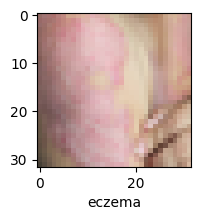

In [ ]:
plot_sample(X_train, y_train, 3)

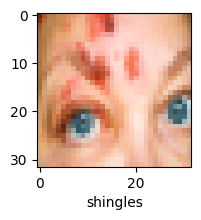

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### Normalizing the training data

In [107]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple artificial neural network for image classification

In [108]:
from tensorflow.keras import models, layers

# Define the model
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')  # Change activation to softmax for multiclass classification
])

# Compile the model with Adam optimizer and a reduced learning rate
ann.compile(optimizer='adam',  # Change optimizer to Adam
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Fit the model with increased epochs
ann.fit(X_train, y_train, epochs=30)  # Increase epochs to 30

Epoch 1/30
19/19 [==============================] - 6s 293ms/step - loss: 6.7946 - accuracy: 0.1164
Epoch 2/30
19/19 [==============================] - 4s 202ms/step - loss: 2.2897 - accuracy: 0.1737
Epoch 3/30
19/19 [==============================] - 4s 203ms/step - loss: 2.1445 - accuracy: 0.2175
Epoch 4/30
19/19 [==============================] - 5s 290ms/step - loss: 2.1668 - accuracy: 0.2091
Epoch 5/30
19/19 [==============================] - 4s 204ms/step - loss: 2.0510 - accuracy: 0.2513
Epoch 6/30
19/19 [==============================] - 4s 207ms/step - loss: 2.0296 - accuracy: 0.2664
Epoch 7/30
19/19 [==============================] - 6s 306ms/step - loss: 2.0307 - accuracy: 0.2327
Epoch 8/30
19/19 [==============================] - 4s 211ms/step - loss: 1.9942 - accuracy: 0.2715
Epoch 9/30
19/19 [==============================] - 4s 204ms/step - loss: 1.9480 - accuracy: 0.2934
Epoch 10/30
19/19 [==============================] - 5s 243ms/step - loss: 1.9405 - accuracy: 0.2648

In [109]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]


# Evaluate the model on test data
test_loss, test_acc = ann.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

8/8 [==============================] - 0s 32ms/step - loss: 2.0544 - accuracy: 0.3529
Test accuracy: 0.3529411852359772
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.43      0.45        28
           1       0.40      0.21      0.28        38
           2       0.24      0.24      0.24        29
           3       0.27      0.14      0.18        29
           4       0.28      0.39      0.33        33
           5       0.41      0.55      0.47        31
           6       0.67      0.33      0.44        12
           7       0.82      0.90      0.86        10
           8       0.28      0.50      0.36        30
           9       0.14      0.07      0.09        15

    accuracy                           0.35       255
   macro avg       0.40      0.38      0.37       255
weighted avg       0.36      0.35      0.34       255



In [110]:
ann.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_16 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_17 (Dense)            (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
ann.evaluate(X_test,y_test)

8/8 [==============================] - 0s 43ms/step - loss: 2.0544 - accuracy: 0.3529


[2.054426431655884, 0.3529411852359772]

### Now let us build a convolutional neural network to train our images

In [118]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(rate=.2,noise_shape=None),
    layers.Dense(10, activation='softmax')
])

In [119]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_20 (Dense)            (None, 64)               

In [120]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [122]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
19/19 [==============================] - 3s 57ms/step - loss: 2.2806 - accuracy: 0.1315
Epoch 2/20
19/19 [==============================] - 1s 63ms/step - loss: 2.1798 - accuracy: 0.1737
Epoch 3/20
19/19 [==============================] - 1s 34ms/step - loss: 2.0840 - accuracy: 0.2260
Epoch 4/20
19/19 [==============================] - 1s 35ms/step - loss: 1.9709 - accuracy: 0.2884
Epoch 5/20
19/19 [==============================] - 1s 36ms/step - loss: 1.8621 - accuracy: 0.3491
Epoch 6/20
19/19 [==============================] - 1s 35ms/step - loss: 1.7695 - accuracy: 0.3811
Epoch 7/20
19/19 [==============================] - 1s 36ms/step - loss: 1.6984 - accuracy: 0.3980
Epoch 8/20
19/19 [==============================] - 1s 36ms/step - loss: 1.6032 - accuracy: 0.4570
Epoch 9/20
19/19 [==============================] - 1s 61ms/step - loss: 1.4996 - accuracy: 0.5025
Epoch 10/20
19/19 [==============================] - 1s 59ms/step - loss: 1.4359 - accuracy: 0.5278
Epoch 11/

In [123]:
cnn.evaluate(X_test,y_test)

8/8 [==============================] - 0s 12ms/step - loss: 2.2791 - accuracy: 0.3608


[2.2791459560394287, 0.3607843220233917]

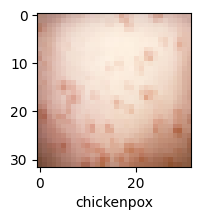

In [124]:
plot_sample(X_test, y_test,104)

In [125]:
classes[y_new[104]]

'chickenpox'

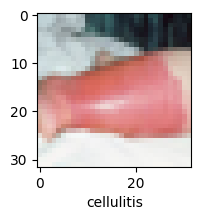

In [126]:
plot_sample(X_test, y_test,50)

In [127]:
classes[y_new[50]]

'cellulitis'

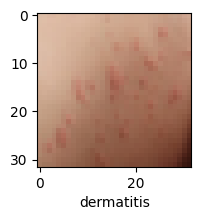

In [128]:
plot_sample(X_test, y_test,90)

In [129]:
classes[y_new[90]]

'dermatitis'